# **Brief:**
Major League Baseball has been changing a lot in recent years. A few noticable trends are an increase in home runs and strikeouts. Another trend has been the use of releivers more than starters. Many possible explanations have been put forth as to why this is happening. This project will help create more discussion for these explanations. 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import io
from scipy.stats import norm
import requests
from bs4 import BeautifulSoup
from time import sleep
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

os.listdir(".")
from google.colab import drive 
drive.mount('/content/gdrive')
battingfile=('gdrive/My Drive/Batting.csv')
pitchingfile=('gdrive/My Drive/Pitching.csv')
teams=('gdrive/My Drive/Teams.csv')
battingDF = pd.read_csv(battingfile)
pitchingDF = pd.read_csv(pitchingfile)
teamsDF=pd.read_csv(teams)
battingDF.head()
pitchingDF.head()
teamsDF.head()

#battingDF.rename(columns={"HR": "Homeruns", inplace=True})
#pitchingDF.rename(columns={"SO":"Stikeouts", inplace=True})

#%matplotlib inline

#data
SO=pitchingDF.groupby('yearID')['SO']
HR=battingDF.groupby('yearID')['HR']
CG=pitchingDF.groupby('yearID')['CG']
G=pitchingDF.groupby('yearID')['G']
GS=pitchingDF.groupby('yearID')['GS']
W=pitchingDF.groupby('yearID')['W']
L=pitchingDF.groupby('yearID')['L']
SV=pitchingDF.groupby('yearID')['SV']
Runs=pitchingDF.groupby('yearID')['R']
SH=teamsDF.groupby('yearID')['SHO']
Hits=teamsDF.groupby('yearID')['H']
bb=teamsDF.groupby('yearID')['BB']
hbp=teamsDF.groupby('yearID')['HBP']
sumHBP=hbp.sum()
sumBB=bb.sum()
sumSH=SH.sum()
sumR=Runs.sum()
sumH=Hits.sum()
avgH=Hits.mean()
AvgGS=GS.mean()
stdGS=GS.std()
medGS=GS.median()
AvgG=G.mean()
medG=G.median()
stdG=G.std()
SumCG=CG.sum()
medSO=SO.median()
medHR=HR.median()
stdSO=SO.std()
stdHR=HR.std()
AvgHR=HR.mean()
SumHR=HR.sum()
AvgSO=SO.mean()
SumSO=SO.sum()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


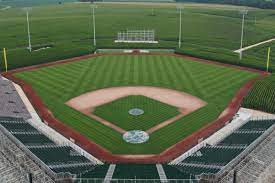


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


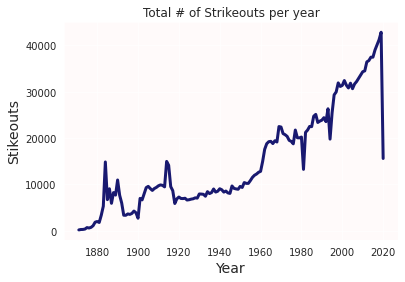

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


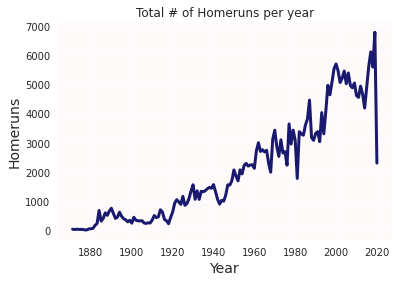

In [ ]:
#sum
plt.plot(SumSO, color='midnightblue', linewidth=3)
plt.title('Total # of Strikeouts per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stikeouts', fontsize=14)
ax=plt.axes()
ax.set_facecolor('snow')

plt.show()
plt.plot(SumHR, color='midnightblue', linewidth=3)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title('Total # of Homeruns per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Homeruns', fontsize=14)
plt.show()

# **Both homeruns and strikeouts increasing**


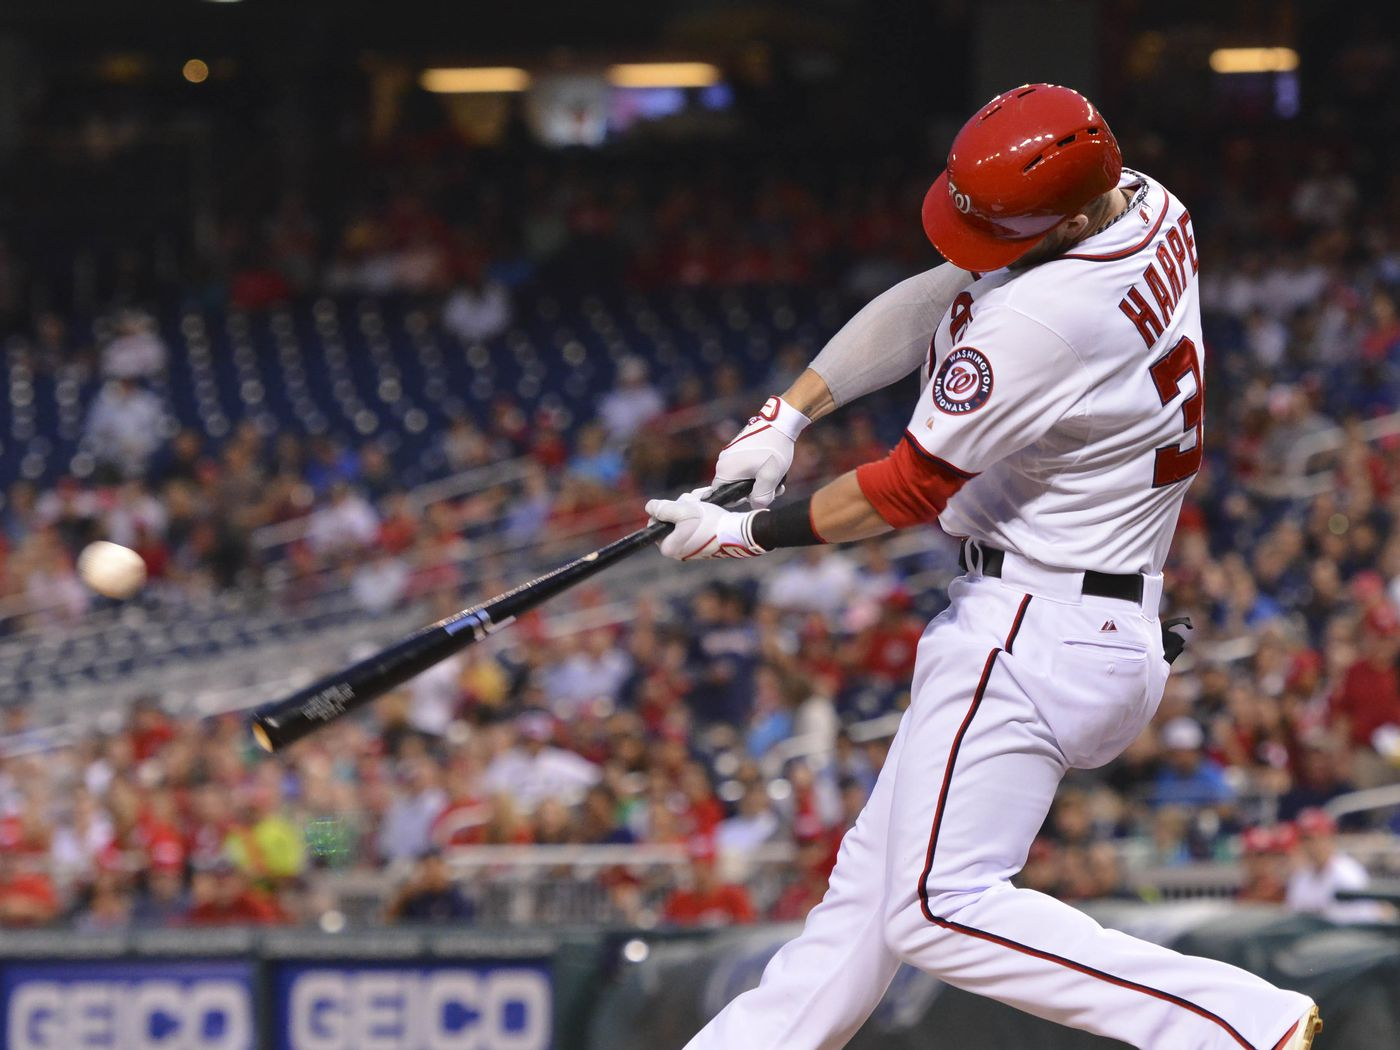

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


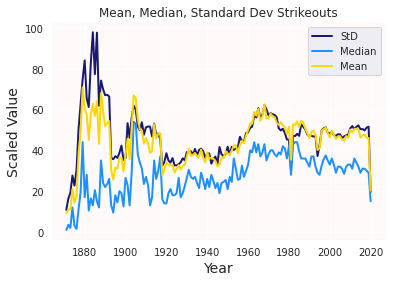

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


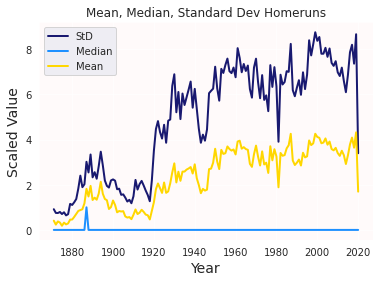

In [ ]:
#mmstdso
plt.plot(stdSO,color='midnightblue', label='StD', linestyle='-', linewidth=2)
plt.plot(medSO,color='dodgerblue', label='Median', linestyle='-', linewidth=2)
plt.plot(AvgSO, color='gold', label='Mean', linestyle='-', linewidth=2)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title("Mean, Median, Standard Dev Strikeouts")
plt.xlabel('Year',fontsize=14)
plt.ylabel('Scaled Value',fontsize=14)
plt.legend()
plt.show()

#mmstdhr
plt.plot(stdHR,color='midnightblue', label='StD', linestyle='-', linewidth=2)
plt.plot(medHR,color='dodgerblue', label='Median', linestyle='-', linewidth=2)
plt.plot(AvgHR, color='gold', label='Mean', linestyle='-', linewidth=2)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title("Mean, Median, Standard Dev Homeruns")
plt.xlabel('Year',fontsize=14)
plt.ylabel('Scaled Value',fontsize=14)
plt.legend()
plt.show()

# **As expected, the mean, median, and standard deviation of player home runs follow the trends we previously observed.**

For strikeouts, it doesn't fully follow the trend, but the data could be skewed by players who did not make many appearances.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


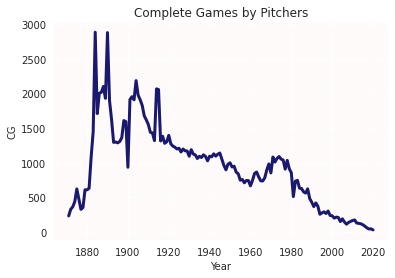

In [ ]:
plt.plot(SumCG, color='midnightblue', linewidth=3)
plt.title("Complete Games by Pitchers")
plt.xlabel("Year")
plt.ylabel("CG")
ax=plt.axes()
ax.set_facecolor('snow')
plt.show()

### As you can see the amount of complete games by pitchers has gone down as time has gone by. This could be an explanation for the average amount of strikeouts per pitcher going down, as more pitchers are playing as teams go to the bullpen more often. It is more common to have pitchers only pitch one inning in a game than a full nine now.

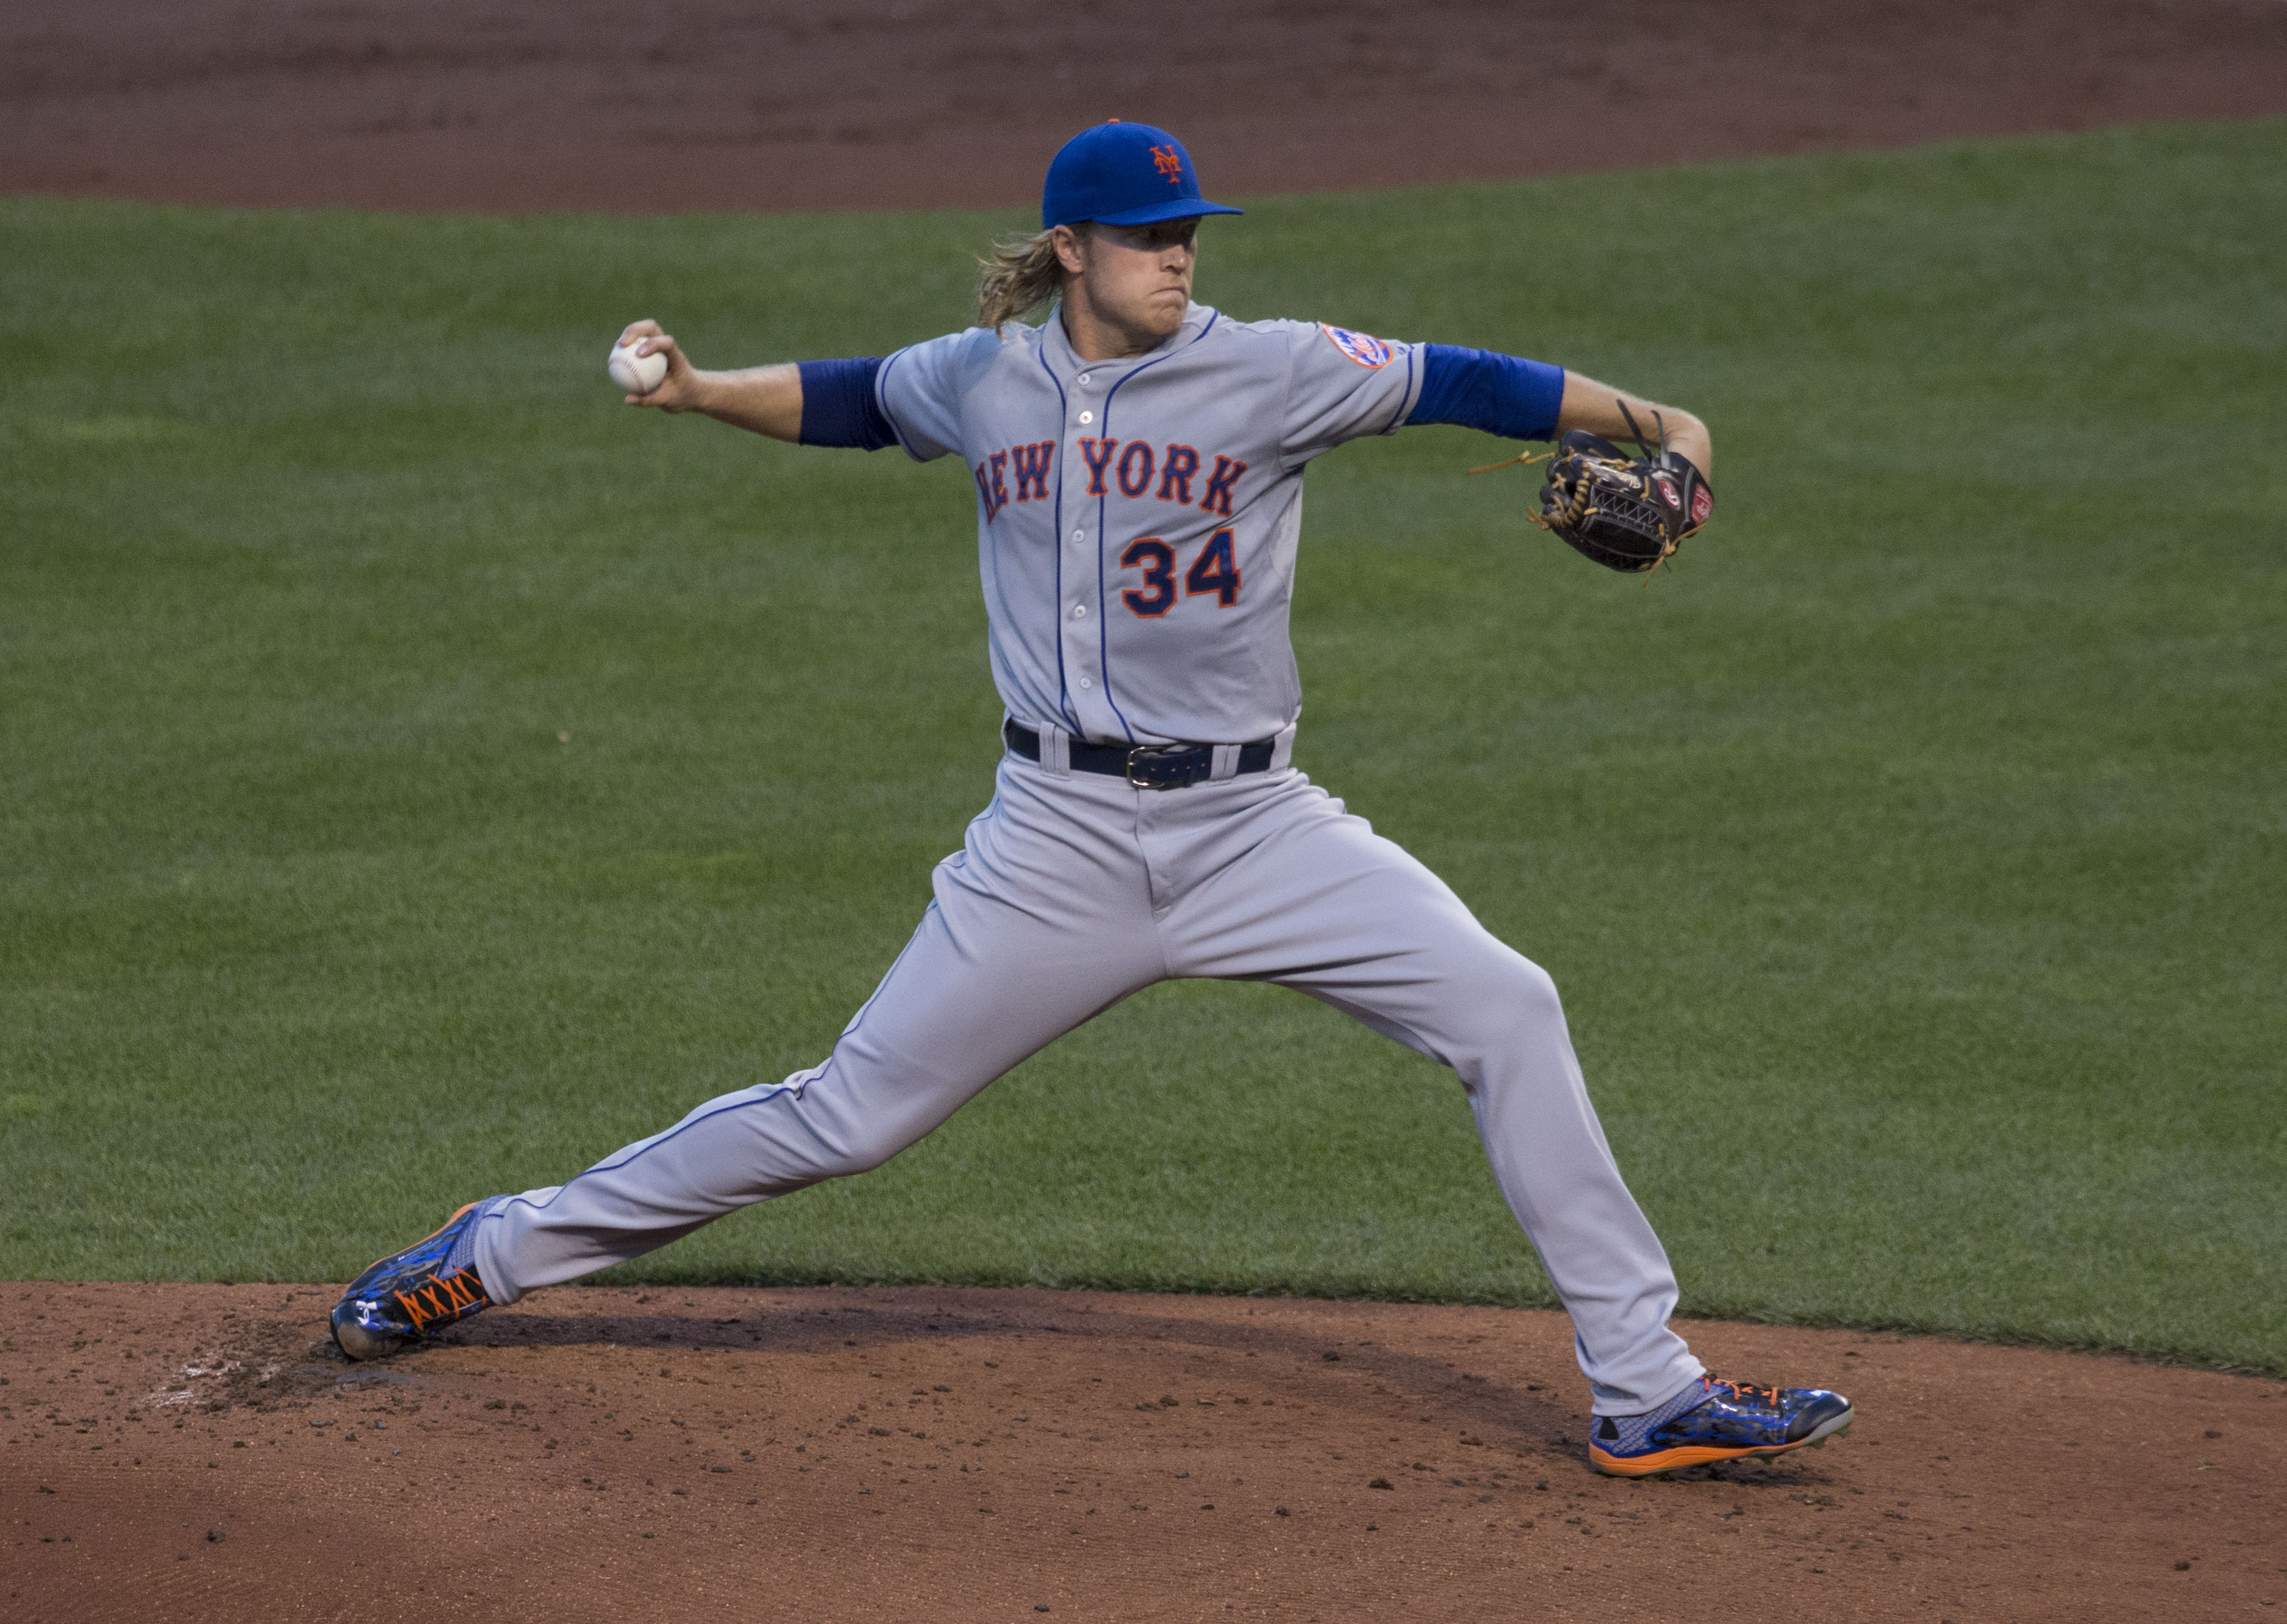

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


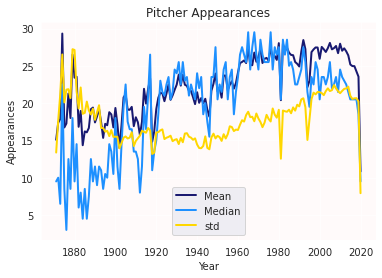

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


<function matplotlib.pyplot.title>

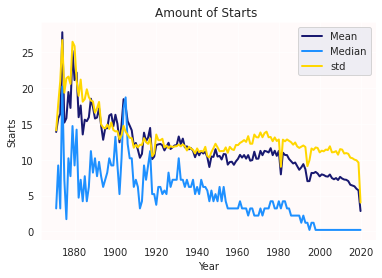

In [ ]:
plt.plot(AvgG+.5, color='midnightblue',label='Mean', linewidth=2)
plt.plot(medG+.5, color='dodgerblue',label='Median', linewidth=2)
plt.plot(stdG+.5,color='gold', label='std', linestyle='-', linewidth=2 )
ax=plt.axes()
ax.set_facecolor('snow')
plt.title("Pitcher Appearances")
plt.xlabel("Year")
plt.ylabel("Appearances")
plt.legend()
plt.show()

plt.plot(AvgGS+.5, color='midnightblue',label='Mean', linewidth=2)
plt.plot(medGS +.2, color='dodgerblue',label='Median', linewidth=2)
plt.plot(stdGS +.2, color='gold',label='std', linewidth=2)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title("Amount of Starts ")
plt.xlabel("Year")
plt.ylabel("Starts")
plt.legend()
plt.title


**As you can see the amount of appearances for pitchers has gone up, while the amount of games started has gone down. I beleive the reasoning behind this is due to releivers being used more. Starters do not go deep into games and many teams will even start games with relievers before going to their "starting pitcher" or just use relievers the whole game in what's called a "bullpen game".**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


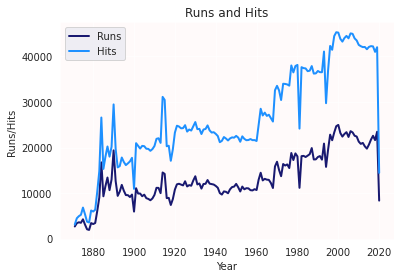

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


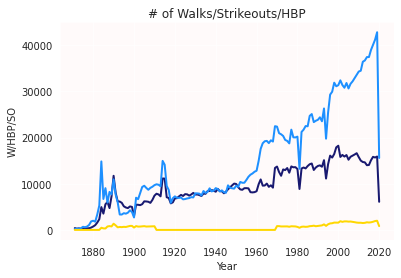

In [ ]:
plt.plot(sumR+.5, color='midnightblue',label='Runs', linewidth=2)
plt.plot(sumH+.5, color='dodgerblue',label='Hits', linewidth=2)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title("Runs and Hits")
plt.xlabel("Year")
plt.ylabel("Runs/Hits")
plt.legend()
plt.show()

plt.plot(sumBB, color='midnightblue',label='Walks', linewidth=2)
plt.plot(SumSO, color='dodgerblue', label='Strikeouts', linewidth=2 )
plt.plot(sumHBP, color='gold', label='HBP', linewidth=2)
plt.title("# of Walks/Strikeouts/HBP")
plt.xlabel("Year")
plt.ylabel("W/HBP/SO")
ax=plt.axes()
ax.set_facecolor('snow')
plt.show()


Total amount of runs and hits have increased along with homeruns

Amount of walks has also increased a lot. **bold text**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


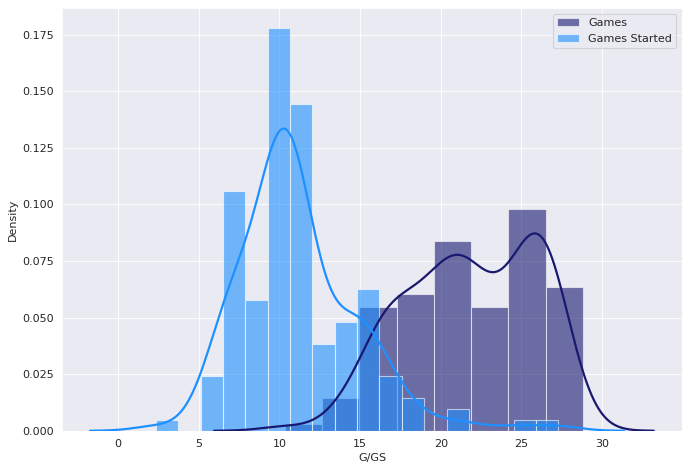

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


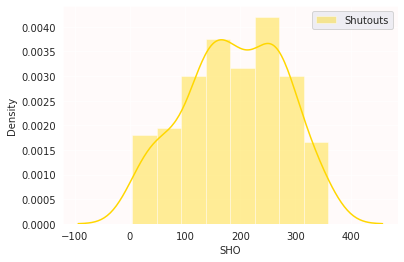

In [ ]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.set_style("darkgrid")
sns.distplot(AvgG, color='midnightblue',label='Games', **kwargs )
sns.distplot(AvgGS, color='dodgerblue',label='Games Started', **kwargs )
plt.xlabel('G/GS')
plt.legend()
plt.show()

sns.distplot(sumSH+.5, color='gold',label='Shutouts')
ax=plt.axes()
ax.set_facecolor('snow')
plt.legend()
plt.show()

Distribution of Games/Games Started

Amount of shutouts thrown by teams (starters/releivers combined) also shown.

**In conclusion, MLB today is seeing more strikeouts and nearly as many walks than ever. There are way more home runs but also fewer balls in play, as well as in some of the lowest batting averages in history.**:

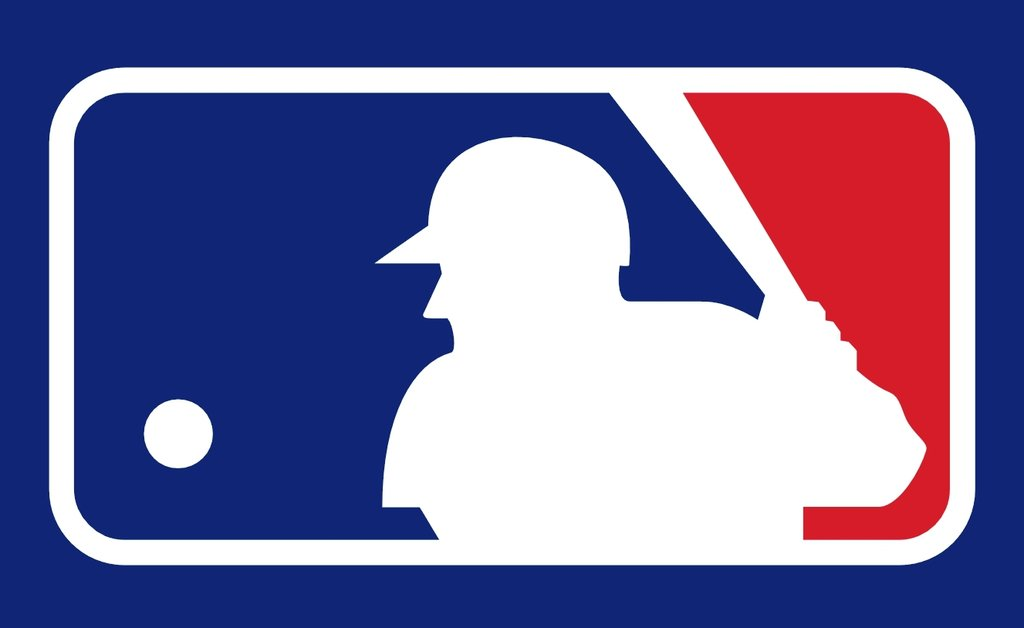